# Question 1: Counting the frequencies in a list using dictionary in Python given an unsorted list of some elements

0 : 2
1 : 3
2 : 4
3 : 5
4 : 5
5 : 2
6 : 6
7 : 4
8 : 3
9 : 5
10 : 3


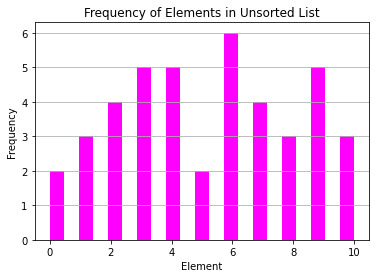

In [178]:
import json
import matplotlib.pyplot as plt

# Sorting List
unsortedlist =[2,4,6,8,4,5,2,1,9,0,4,6,7,4,3,2,1,9,10,3,7,9,6,0,1,3,5,6,7,8,9,10,2,3,6,8,9,10,6,7,4,3]
frequency = {} 
for x in unsortedlist: 
    frequency[x] = unsortedlist.count(x)
        
for key, values in sorted(frequency.items()):
    print(key, ':', values)

# Plotting Results
plt.hist(unsortedlist, 21, color='magenta')
plt.grid(axis='y')
plt.title("Frequency of Elements in Unsorted List")
plt.xlabel("Element")
plt.ylabel("Frequency")
plt.show()

# Store results as json
with open('dict_results.json', 'w') as in_file:
    json.dump(frequency, in_file, sort_keys=True, indent=1)

# Question 2, Choice 2: How Much Have You Spent on Amazon? Analyze Amazon Data in different ways, plot your historical transactions amount. You can either summarize that into monthly payment, or show your mean payment, etc.

In [106]:
import pandas as pd
df = pd.read_csv('/Users/benzaloga/Documents/year 3/spring/stat computing/amazon-data.csv')
df["Total Charged"] = df["Total Charged"].str.replace('$','').astype(float)
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,09/30/18,112-2684899-2885004,MasterCard - 4113,Amazon.com,NaN,benjaminzaloga@gmail.com,10/02/18,Benjamin Zaloga,1900 F ST NW,NaN,...,Shipped,UPS(1Z077V0E0300022474),$63.15,$0.00,$2.48,$0.00,$2.48,65.63,Ben Zaloga,NaN
1,09/30/18,112-2684899-2885004,MasterCard - 4113,Amazon.com,NaN,benjaminzaloga@gmail.com,10/01/18,Benjamin Zaloga,1900 F ST NW,NaN,...,Shipped,USPS(9374889678092334052832),$14.95,$0.00,$0.00,$0.00,$0.00,14.95,Ben Zaloga,NaN
2,09/30/18,112-8048751-6965834,MasterCard - 4113,Amazon.com,NaN,benjaminzaloga@gmail.com,10/01/18,Benjamin Zaloga,1900 F ST NW,NaN,...,Shipped,USPS(9400110200882853069419),$3.99,$4.49,$0.00,$0.00,$0.00,8.48,Ben Zaloga,NaN
3,09/30/18,112-8472124-6020269,MasterCard - 4113,Amazon.com,NaN,benjaminzaloga@gmail.com,09/30/18,Benjamin Zaloga,1900 F ST NW,NaN,...,Shipped,NaN,$1.43,$0.00,$0.08,$0.00,$0.08,1.51,Ben Zaloga,NaN
4,10/28/18,112-6053322-8885808,MasterCard - 4113,Amazon.com,NaN,benjaminzaloga@gmail.com,10/28/18,Benjamin Zaloga,1900 F ST NW,NaN,...,Shipped,AMZN_US(TBABWI500069395),$24.99,$0.00,$1.20,$5.00,$1.20,21.19,Ben Zaloga,NaN


In [54]:
# Summary Statistics
print('Data shape:', df.shape)
print('Maximum spent on a single Amazon order:', round(df["Total Charged"].sum(),2))
print('Average amount spent on Amazon orders:', round(df["Total Charged"].mean(),2))
print('Median amount spent on Amazon orders:', round(df["Total Charged"].median(),2))

Data shape: (45, 23)
Maximum spent on a single Amazon order: 1372.87
Average amount spent on Amazon orders: 30.51
Median amount spent on Amazon orders: 19.5


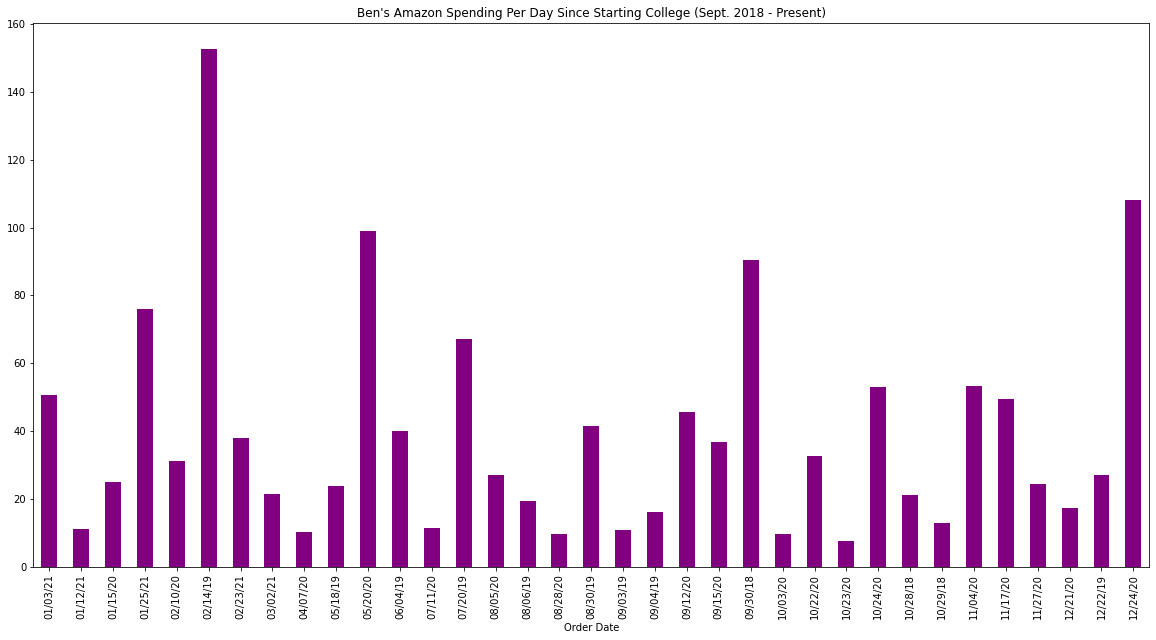

In [175]:
daily_orders = df.groupby('Order Date').sum()["Total Charged"]
daily_orders.plot.bar(title="Ben's Amazon Spending Per Day Since Starting College (Sept. 2018 - Present)", figsize=(20, 10), color='purple')

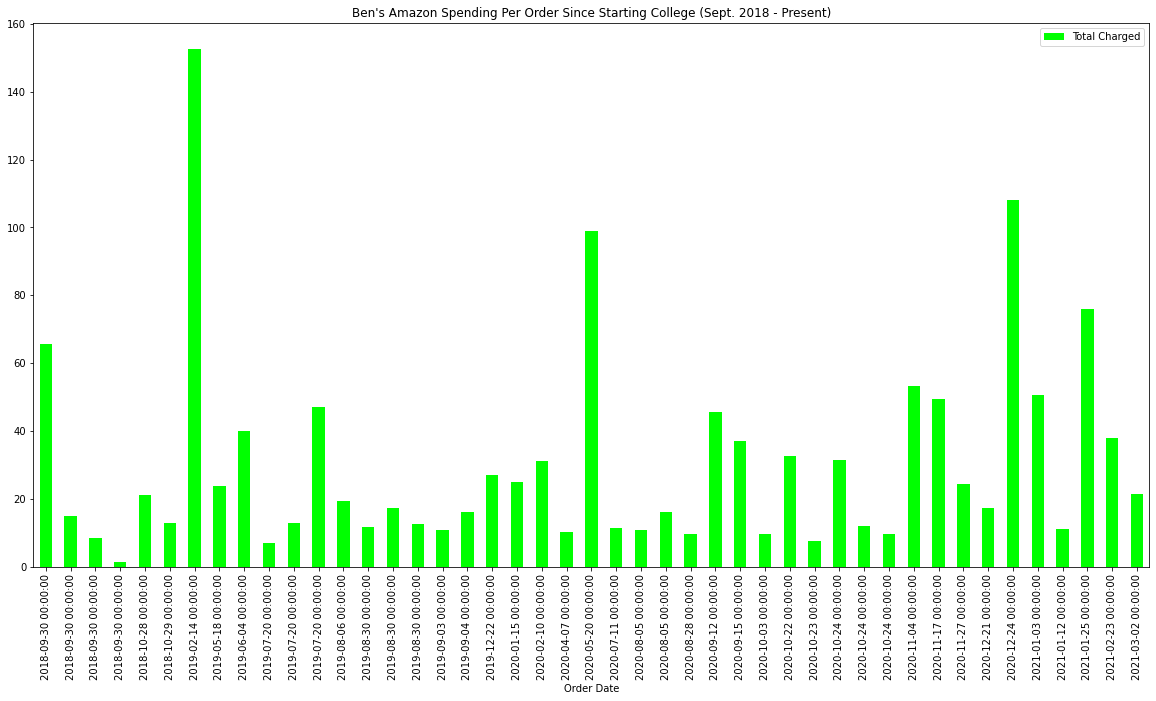

In [177]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()
df.plot.bar(x='Order Date', y='Total Charged', title="Ben's Amazon Spending Per Order Since Starting College (Sept. 2018 - Present)",rot=90, figsize=(20,10), color = 'lime')